<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Inventario_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │       0.658681  │        52 │                 62 │ 88                 │          0 │         2 │                           106 │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   88 │       0.97673   │        58 │                 58 │ 30                 │          0 │         2 │                            73 │
├───────┼───────────────────

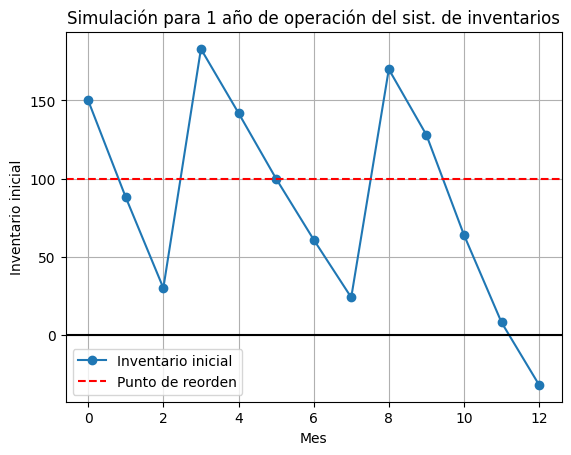

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                          1302.6 │                3950 │        5552.6 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛
Valores óptimos: q = 205.0, R = 112.5
╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│

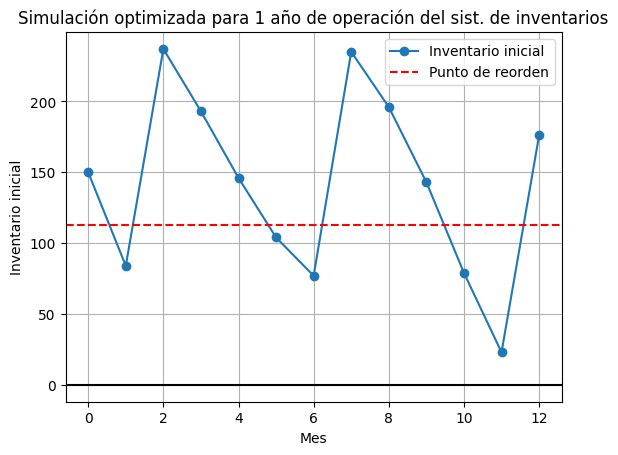

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│              337.5 │                         1830.32 │                1450 │       3617.82 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛


In [2]:
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

def simulacion_inventario(q, R):
    def demanda():
        prob = [0, 0.01, 0.025, 0.045, 0.065, 0.087, 0.11, 0.135, 0.162, 0.19, 0.219, 0.254, 0.299, 0.359, 0.424, 0.494, 0.574, 0.649, 0.719, 0.784, 0.844, 0.894, 0.934, 0.964, 0.980, 0.995, 1]
        u = rnd.random()
        for i in range(len(prob)):
            if prob[i-1] <= u <= prob[i]:
                x = i + 34
                break
        return x, u

    def demanda_ajustada(x, mes):
        factor_mes = [1.2, 1, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
        for j in range(len(factor_mes)):
            if mes == j:
                x = round(x * factor_mes[j-1])
        return x

    def entrega(carga_pend, cont_ent):
        carga_pend = True
        v = rnd.random()
        if 0 <= v < 0.3:
            entrega = 1
        elif 0.3 <= v < 0.7:
            entrega = 2
        elif 0.7 <= v < 1:
            entrega = 3
        cont_ent += 1
        return entrega, carga_pend, cont_ent

    inv_inicial = 150
    inventario_i = [150]
    inv_falt = 0
    carga_pend = False
    t_entrega = 0
    cont = -1
    faltante = 0
    data = []
    cont_ent = 0

    for m in range(12):
        mes = m + 1
        dem, val = demanda()
        dem_ajus = demanda_ajustada(dem, mes)
        inv_final = inv_inicial - dem_ajus
        inv_men_prom = (inv_inicial + dem_ajus) / 2

        if inv_final <= R and not carga_pend:
            t_entrega, carga_pend, cont_ent = entrega(carga_pend, cont_ent)

        if carga_pend:
            cont += 1

        if inv_final < 0:
            faltante = abs(inv_final)
            data.append([f"{mes}", f"{inv_inicial}", f"{val}", f"{dem}", f"{dem_ajus}", "-", f"{faltante}", f"{t_entrega}", f"{np.round(inv_inicial**2 / (2 * dem_ajus))}"])
            inv_falt += faltante
        else:
            data.append([f"{mes}", f"{inv_inicial}", f"{val}", f"{dem}", f"{dem_ajus}", f"{inv_final}", f"{faltante}", f"{t_entrega}", f"{np.round(inv_men_prom)}"])

        inv_inicial = inv_final

        if cont == t_entrega:
            cont = -1
            inv_inicial += q
            carga_pend = False
            t_entrega = 0

        faltante = 0
        inventario_i.append(inv_inicial)

    suma_inv_prom = sum(float(fila[-1]) for fila in data)
    costo_total = cont_ent * R + suma_inv_prom * 1.67 + inv_falt * 50
    return costo_total, data, inventario_i, cont_ent, suma_inv_prom, inv_falt

# Prueba inicial con valores de q y R
costo_total, data, inventario_i, cont_ent, suma_inv_prom, inv_falt = simulacion_inventario(200, 100)

# Imprime tabla sin optimizar
headers = ['Mes', 'Inventario inicial', 'No. aleatorio', 'Demanda', 'Demanda ajustada', 'Inventario final', 'Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(data, headers=headers, tablefmt="fancy_grid", showindex=False))

# Imprime gráfica sin optimizar
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="red", linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

costo = [cont_ent * 100, suma_inv_prom * 1.67, inv_falt * 50, costo_total]
print(tabulate([costo], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))

def hooke_jeeves(func, x0, delta, epsilon, alpha=2):
    xp = x0[:]
    xb = x0[:]
    while delta > epsilon:
        xn = explore(func, xp, delta)
        if func(*xn) < func(*xb):
            xp = [2*xn[i] - xb[i] for i in range(len(x0))]
            xb = xn[:]
        else:
            delta /= alpha
            xp = xb[:]
    return xb

def explore(func, xp, delta):
    xn = xp[:]
    for i in range(len(xp)):
        P = func(*xn)
        xn[i] = xp[i] + delta
        N = func(*xn)
        if N > P:
            xn[i] = xp[i] - delta
            if func(*xn) > P:
                xn[i] = xp[i]
    return xn

def costo_total_wrapper(q, R):
    costo_total, _, _, _, _, _ = simulacion_inventario(q, R)
    return costo_total

# Valores iniciales de q y R
x0 = [200, 100]

# Parámetros del algoritmo
delta = 10
epsilon = 1

# Optimización
q_opt, R_opt = hooke_jeeves(costo_total_wrapper, x0, delta, epsilon)

# Simulación con valores óptimos
costo_total_opt, data_opt, inventario_i_opt, cont_ent_opt, suma_inv_prom_opt, inv_falt_opt = simulacion_inventario(q_opt, R_opt)

# Imprime tabla optimizada
print(f"Valores óptimos: q = {q_opt}, R = {R_opt}")
print(tabulate(data_opt, headers=headers, tablefmt="fancy_grid", showindex=False))

# Imprime gráfica optimizada
plt.plot(inventario_i_opt, marker='o', label="Inventario inicial")
plt.title('Simulación optimizada para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(R_opt, color="red", linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

# Tabla de costos optimizados
costo_opt = [cont_ent_opt * R_opt, suma_inv_prom_opt * 1.67, inv_falt_opt * 50, costo_total_opt]
print(tabulate([costo_opt], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))
